In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 50)  # показывать больше столбцов
pd.set_option('display.max_rows', 50)     # показывать больше строк

# from pylab import rcParams
# %config InlineBackend.figure_format = 'svg'
# rcParams['figure.figsize'] = 10, 5

## Загрузка данных
### Описание датасета

Задача: оптимизировать полеты зимнего периода 2017 года авиакомпании из города Анапы.

Описание датасета:

In [4]:
description = pd.read_excel('dataset-description.xlsx')
display(description)

,flight_id,ID рейса
0,scheduled_departure,запланированная дата и время вылета
1,day_part,часть суток (утро/день/вечер/ночь)
2,flight_departure_ontime,"признак вылета рейса по расписанию (""0""-воврем..."
3,flight_arrival_ontime,"признак прибытия рейса по расписанию (""0""-вовр..."
4,airp_departure,аэропорт вылета
5,airp_arrival,аэропорт прибытия
6,arrival_airport,код аэропорта прибытия
7,flight_model,модель самолета
8,distance_from_anapa,расстояние полета из города Анапа
9,flying_time_hours,время полета в часах


In [22]:
df = pd.read_csv('dataset.csv',index_col=None)

# надо преобразовать поле "scheduled_departure" в дату
df.scheduled_departure.replace("T"," ").replace("Z","")
df['scheduled_departure'] = pd.to_datetime(df['scheduled_departure'],format='%Y-%m-%d %H:%M:%S')

# надо также округлить все дробные значения
cols=['flying_time_hours', 'flight_fuel_cons_cost', 'flight_total_cost','profit_simple',
      'profit','total_seats','total_sold_tickets','prc_sold_tickets','total_amount',
      'max_revenue','lost_revenue','b_nmb_total_seats','b_total_sold_tickets',
      'b_prc_sold_tickets','b_total_amount','b_avg_amount','b_lost_revenue','e_nmb_total_seats',
      'e_total_sold_tickets','e_prc_sold_tickets','e_total_amount','e_avg_amount','e_lost_revenue']
df[cols] = df[cols].round(2)


df.head(3).T

,0,1,2
flight_id,136119,136120,136122
scheduled_departure,2017-01-03 10:05:00+00:00,2017-02-24 10:05:00+00:00,2017-01-08 10:05:00+00:00
day_part,morning,morning,morning
flight_departure_ontime,-1,-1,-1
flight_arrival_ontime,-1,-1,-1
airp_departure,Anapa,Anapa,Anapa
airp_arrival,Moscow,Moscow,Moscow
arrival_airport,SVO,SVO,SVO
flight_model,Boeing 737-300,Boeing 737-300,Boeing 737-300
distance_from_anapa,1220,1220,1220


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   flight_id                127 non-null    int64              
 1   scheduled_departure      127 non-null    datetime64[ns, UTC]
 2   day_part                 127 non-null    object             
 3   flight_departure_ontime  127 non-null    int64              
 4   flight_arrival_ontime    127 non-null    int64              
 5   airp_departure           127 non-null    object             
 6   airp_arrival             127 non-null    object             
 7   arrival_airport          127 non-null    object             
 8   flight_model             127 non-null    object             
 9   distance_from_anapa      127 non-null    float64            
 10  flying_time_hours        127 non-null    float64            
 11  flight_fuel_cons_cost    127 non

In [24]:
# определим по каким городам у нас пропуски в данных
df[df['profit_simple'].isna()==True]['arrival_airport'].value_counts()

NOZ    9
Name: arrival_airport, dtype: int64

все пропуски по одному аэропорту Новокузнецк.
Посмотрим а сколько в датасэте вообще строк с местом прибытия Новокузнецк

In [25]:
df[df['arrival_airport']=='NOZ'].flight_id.count()

9

In [26]:
df[df['arrival_airport']=='NOZ']['flight_id']

59    136511
60    136513
61    136514
62    136523
63    136540
64    136544
65    136546
66    136560
67    136567
Name: flight_id, dtype: int64

Получается, что все записи по Новокузнецку не содержат данных по продажам, есть только те что касаются самого самолета. 
Это явно какая то ошибка в данных - для дальнейшего анализа исключаю их.  
В презентации надо указать, что либо тут потеря данных, либо ошибка ввода данных в БД.

In [27]:
df=df[df['arrival_airport']!='NOZ']
df['arrival_airport'].value_counts()

SVO    59
EGO    59
Name: arrival_airport, dtype: int64

Удалили Новокузнецк, и как интересно получилось - у нас одинаковое количество рейсов в Москву и Белгород.

In [28]:
# посмотрим на минимальную сумму прибыли (по полю "profit_simple")
df.profit_simple.min()

470757.13

Получается, что по минимальной формуле расчета прибыльности (продажа билетов минус затраты только на топливо) все рейсы прибыльные.  
Посмотрим, что изменится при расчтете прибыльности исходя из того, что затраты на топливо составляют 25% от всех затрат на рейс.  
(по просмотренным годовым отчетам доля авиатоплива находится в диапазоне 15-35%, я для расчетов выбрал 25% [меньший процент будет означать, что общие затраты будут больше])

In [29]:
df.profit.min()

290028.51

In [30]:
df.profit.mean()

687475.5622033908

In [12]:
# посмотрим по направлениям - какое дало нам меньше прибыли на один рейс
df.groupby(['arrival_airport'])['profit'].sum()

arrival_airport
EGO    27698382.09
SVO    53423734.25
Name: profit, dtype: float64

Получается, что рейсы в Москву прибыльнее почти в два раза. Посмотрим на средний процент заполненности самолета

In [13]:
df.groupby(['arrival_airport'])['prc_sold_tickets'].mean()

arrival_airport
EGO    92.975763
SVO    87.014915
Name: prc_sold_tickets, dtype: float64

In [14]:
# Заполненность в МСК ниже чем в Белгород, тут только может влиять стоимость билета. Убедимся в этом.
df['avg_ticket_cost']=round(df['total_amount']/df['total_sold_tickets'],2)

df.groupby(['arrival_airport'])['avg_ticket_cost'].mean()

arrival_airport
EGO     7876.502203
SVO    14521.025085
Name: avg_ticket_cost, dtype: float64

Так и есть билет в Москву почти в два раза дороже.
Посмотрим какие модели самолетов летают в города.

In [15]:
df.groupby(['arrival_airport','flight_model','total_seats'])['avg_ticket_cost'].mean()

arrival_airport  flight_model         total_seats
EGO              Sukhoi Superjet-100  97.0            7876.502203
SVO              Boeing 737-300       130.0          14521.025085
Name: avg_ticket_cost, dtype: float64

In [16]:
# А если посмотреть на количество мест в самолетах то видим, что в Москву летем ещё и большего размера самолет.


медианные значения показателей по направлениям полетов


,prc_sold_tickets,total_sold_tickets,total_seats,profit,flying_time_hours
arrival_airport,,,,,
EGO,97.94,95.0,97.0,505428.51,0.83
SVO,86.15,112.0,130.0,891510.75,1.67


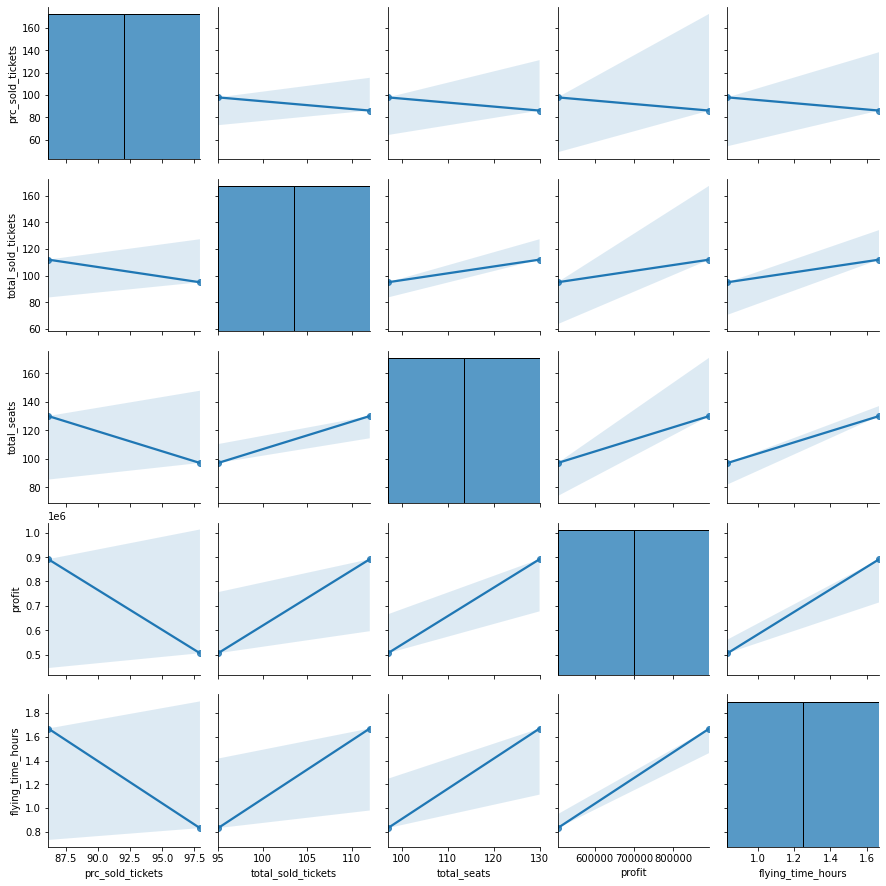

In [17]:
# посмотрим на графики по основным характеристикам может ещё что увидим
dg=pd.DataFrame(df[['prc_sold_tickets','total_sold_tickets','total_seats','profit','flying_time_hours']]
                          .groupby(df['arrival_airport']).median())

print('\nмедианные значения показателей по направлениям полетов')
display(dg)
sns.pairplot(dg, kind = 'reg')

In [18]:
# посмотрим на зависимость выкупа билетов в зависимости от класса билета
dg2=pd.DataFrame(df[['total_sold_tickets','prc_sold_tickets','b_prc_sold_tickets','e_prc_sold_tickets']]
                          .groupby(df['arrival_airport']).median())
print('\nмедианные значения показателей по классам билетов')
display(dg2)


медианные значения показателей по классам билетов


,total_sold_tickets,prc_sold_tickets,b_prc_sold_tickets,e_prc_sold_tickets
arrival_airport,,,,
EGO,95.0,97.94,100.00,97.65
SVO,112.0,86.15,91.67,86.44


Получается, что тип класса не влияет на общую доходность рейсов (вернее он одинаково высокий по городам-направлениям и поэтому не даёт нам зависимости). Получается, что вся работа в postgree по выделению этих данных была напрасной (кроме получения опыта в написании запроса), хотя есть и положительная сторона - при получении уточненных данных по затаратам, можно упростить запрос на выгрузку датасета. 

In [19]:
# еще один апект анализа - по дням неделям рейсов.
df['week_day']=df['scheduled_departure'].apply(lambda x: x.weekday())
# 0-Пн, 1-Вт, 2-Ср, 3-Чт, 4-Пт, 5-Сб, 6-Вс

In [20]:
# посмотрим на зависимость покупки билетов в зависимости от дня недели

dg3=df.groupby(['arrival_airport','week_day']).median()
dg3=dg3[['prc_sold_tickets','b_prc_sold_tickets','e_prc_sold_tickets','avg_ticket_cost']]
# dg3=pd.DataFrame(df[['total_sold_tickets','prc_sold_tickets','b_prc_sold_tickets','e_prc_sold_tickets']]
#                           .groupby(['arrival_airport','week_day']).median())
print('\nмедианные значения показателей по классам билетов')
display(dg3)


медианные значения показателей по классам билетов


prc_sold_tickets  b_prc_sold_tickets  \
arrival_airport week_day                                         
EGO             0                   92.780             100.000   
                1                   96.910             100.000   
                2                   98.970             100.000   
                3                   95.360             100.000   
                4                   94.845              95.835   
                5                   97.940              95.835   
                6                   90.720              91.670   
SVO             0                   83.080              83.330   
                1                   90.770              91.670   
                2                   86.540              91.670   
                3                   86.155              91.670   
                4                   89.230              91.670   
                5                   88.845              91.670   
                6                   80.770              91.670   

                          e_prc_sold_tickets  avg_ticket_cost  
arrival_airport week_day                                       
EGO             0                     91.760         7889.690  
                1                     96.470         7889.690  
                2                     98.820         7906.250  
                3                     94.705         7889.690  
                4                     94.705         7889.690  
                5                     98.235         7889.690  
                6                     90.590         7902.270  
SVO             0                     83.050        14507.690  
                1                     91.530        14336.750  
                2                     86.440        14561.050  
                3                     86.865        14592.665  
                4                     88.985        14629.510  
                5                     88.560        14586.190  
                6                     79.660        14705.450

Из данных следует, что на обоих направлениях пассажиры не любят летать в воскресенье и понедельник.  
Следует подумать о возможных скидках или "плюшках" для пассажиров в эти дни.  
Особенно в воскресенье, тк именно в этот день максимальна для Москвы и практически максимальна для Белгорода.

In [21]:
# посмотрим на зависимость выкупа билетов в зависимости от полетов по расписанию

dg4=df.groupby(['arrival_airport','week_day']).mean()
dg4=dg4[['flight_departure_ontime','flight_arrival_ontime']]
# dg3=pd.DataFrame(df[['total_sold_tickets','prc_sold_tickets','b_prc_sold_tickets','e_prc_sold_tickets']]
#                           .groupby(['arrival_airport','week_day']).median())
print('\nмедианные значения показателей по своевременному полету')
display(dg4)


медианные значения показателей по своевременному полету


flight_departure_ontime  flight_arrival_ontime
arrival_airport week_day                                                
EGO             0                       -1.000000              -0.888889
                1                       -0.888889              -1.000000
                2                       -0.875000              -0.875000
                3                       -1.000000              -0.875000
                4                       -1.000000              -1.000000
                5                       -1.000000              -1.000000
                6                       -1.000000              -1.000000
SVO             0                       -1.000000              -1.000000
                1                       -0.888889              -0.777778
                2                       -1.000000              -0.875000
                3                       -1.000000              -1.000000
                4                       -0.875000              -0.750000
                5                       -1.000000              -1.000000
                6                       -0.777778              -0.666667

Из этих данных также следует, что рейсы в среднем и вылетают и прилетают раньше расписания.  
Следовательно, они нам не дают дополнительной информации и эти признаки также можно будет исключить на следующем этапе анализа.

# --------------------------------------------------------------------------------------

Получается, что рейсы в МСК выгоднее для авиакомпании, и поскольку убыточных нет  
то и закрывать какие-либо рейсы я считаю нецелесообразным на данном уровне анализа.  

**Для полноценного анализа необходимо сделать следующее:**
1. Понять причины отсутствия данных по рейсам в Новокузнецк (и вернуть их с полными данными при необходимости)
2. Получить истинные данные по затратам на рейс
3. Кроме затрат на рейсы у авиакомпании есть затраты на офисы продаж и сам центральный офис - необходимо корректно добавить эти данные в расчеты
4. У авиакомпании помимо прямых доходов с продаж билетов есть еще и дополнительные источники доходов. Например, оплата багажа по перевесу или негабаритных размеров, продажа еды, напитков и вещей в салоне самолета, или оказание попутных логистических услуг по перевозке грузов.
5. Сам по себе анализ полетов только в одну сторону очень странный, так как самолеты обычно летают по рейсам в обе стороны. Поэтому считаю необходимым добавить в анализ еще и обратные рейсы.